# Data Cleaning Notebook

## Objectives
- Evaluate missing data to determine the need for cleaning.
- Clean data by addressing missing values, outliers, and irrelevant features.

## Inputs
- outputs/datasets/collection/Fahrraddiebstahl.csv (collected dataset).

## Outputs
- Cleaned train and test sets saved under outputs/datasets/cleaned/.

1. Change the Working Directory

In [1]:
import os

# Get the current directory
current_dir = os.getcwd()
print(f"Current directory: {current_dir}")

# Set the parent directory as the new working directory
os.chdir(os.path.dirname(current_dir))
print(f"New working directory: {os.getcwd()}")

Current directory: /workspace/bicycle_thefts_berlin/jupyter_notebooks
New working directory: /workspace/bicycle_thefts_berlin


2. Load Collected Data

In [2]:
import pandas as pd

# Path to your dataset (replace with the actual path)
df_raw_path = "outputs/datasets/collection/Fahrraddiebstahl.csv"

# Load the dataset
df = pd.read_csv(df_raw_path, encoding='latin1')

# Preview the first few rows
df.head(3)

,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
0,2023-11-25,2023-11-23,15,2023-11-25,8,10100207,5500,0,Fahrrad,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...
1,2023-11-25,2023-11-25,9,2023-11-25,14,2400521,2400,0,Herrenfahrrad,Fahrraddiebstahl,Einfacher Diebstahl von FahrrÃ¤dern
2,2023-11-25,2023-11-24,13,2023-11-24,22,6300630,2399,0,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von FahrrÃ¤dern


3. Data Exploration
Evaluate variables with missing data:

In [3]:
# List of variables with missing data
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()

# Display missing variables
vars_with_missing_data

[]

4. Correlation and PPS Analysis
You can analyze the correlation and Power Predictive Score (PPS) between features to evaluate relationships.

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


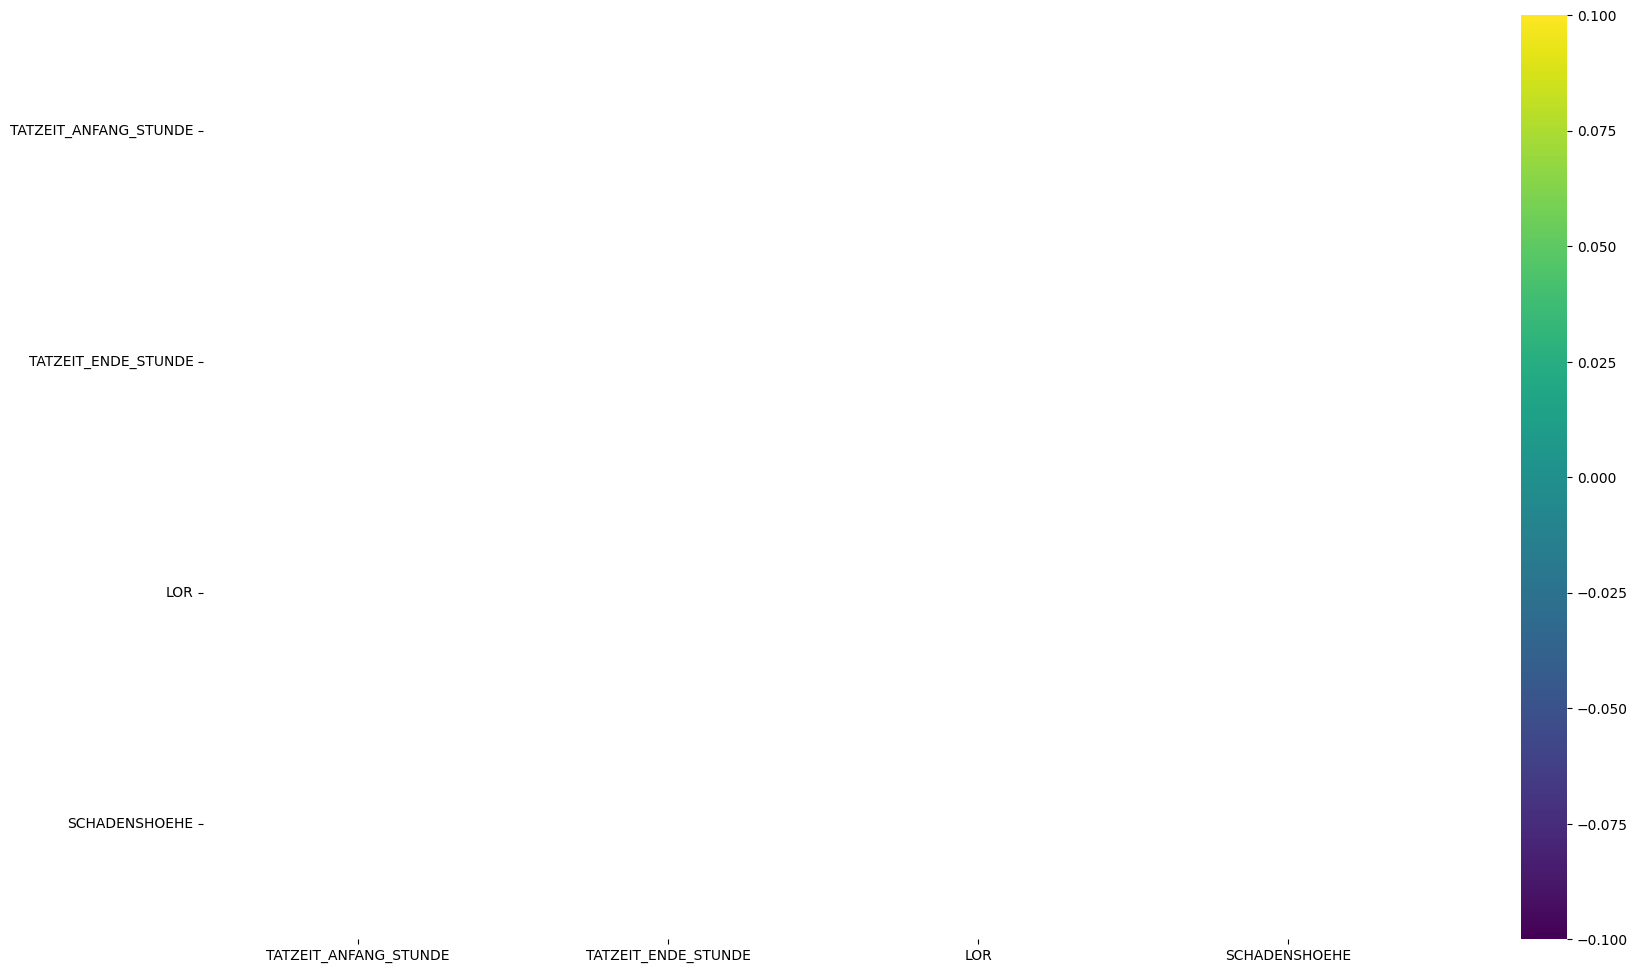

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


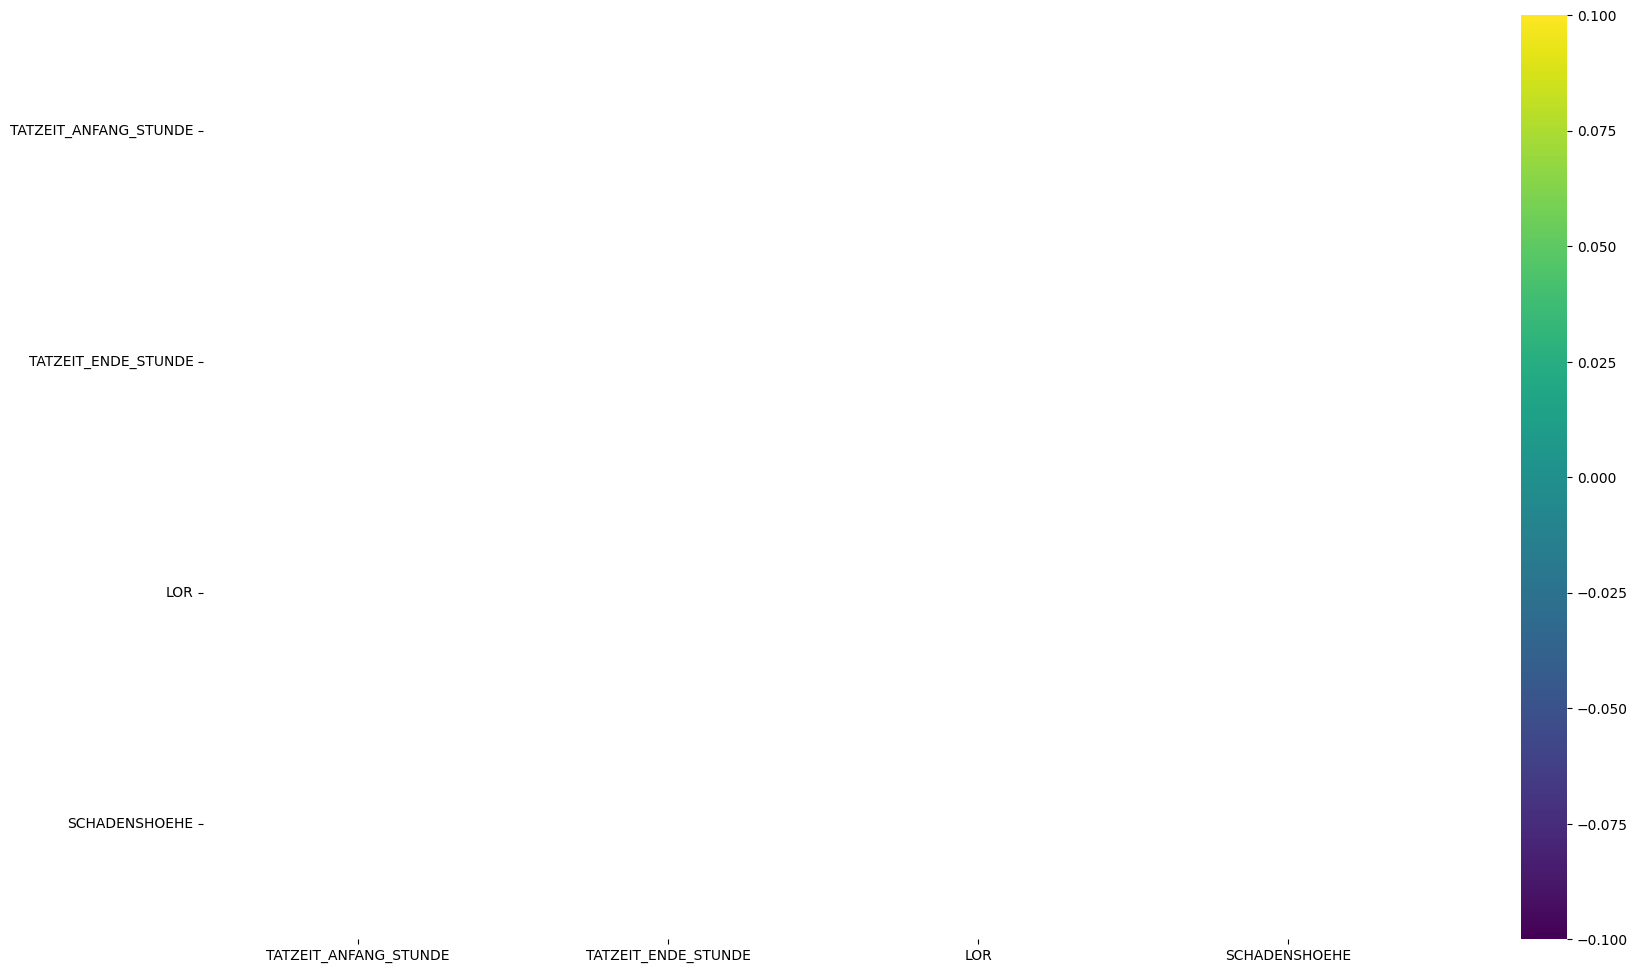

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation functions (without PPS)
def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    mask[abs(df) < threshold] = True
    fig, axes = plt.subplots(figsize=figsize)
    sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True, mask=mask, cmap='viridis',
                annot_kws={"size": font_annot}, ax=axes, linewidth=0.5)
    axes.set_yticklabels(df.columns, rotation=0)
    plt.ylim(len(df.columns), 0)
    plt.show()

def CalculateCorr(df):
    # Filter only numeric columns to avoid issues with non-numeric data
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Calculate correlation
    df_corr_spearman = df_numeric.corr(method="spearman")
    df_corr_pearson = df_numeric.corr(method="pearson")
    
    return df_corr_pearson, df_corr_spearman

# Calculate correlation
df_corr_pearson, df_corr_spearman = CalculateCorr(df)

# Display correlation heatmaps
heatmap_corr(df_corr_spearman, threshold=0.4)
heatmap_corr(df_corr_pearson, threshold=0.4)

5. Assessing Missing Data Levels
Display missing data levels in the dataset:

In [5]:
def EvaluateMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute / len(df) * 100, 2)
    df_missing_data = pd.DataFrame({
        "RowsWithMissingData": missing_data_absolute,
        "PercentageOfDataset": missing_data_percentage,
        "DataType": df.dtypes
    }).sort_values(by="PercentageOfDataset", ascending=False).query("PercentageOfDataset > 0")
    
    return df_missing_data

# Evaluate missing data
EvaluateMissingData(df)

,RowsWithMissingData,PercentageOfDataset,DataType


6. Data Cleaning Pipeline
Drop irrelevant variables: If there are any irrelevant features like IDs.
Handle missing data: You can either fill or drop missing values.

In [6]:
# Drop irrelevant columns if needed (e.g., any ID columns)
# df.drop(columns=['irrelevant_column'], inplace=True)

# Example: Fill missing numerical values with the median
df['SCHADENSHOEHE'].fillna(df['SCHADENSHOEHE'].median(), inplace=True)

# Example: Fill missing categorical values with the mode
df['ART_DES_FAHRRADS'].fillna(df['ART_DES_FAHRRADS'].mode()[0], inplace=True)

/tmp/ipykernel_7386/980553934.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SCHADENSHOEHE'].fillna(df['SCHADENSHOEHE'].median(), inplace=True)
/tmp/ipykernel_7386/980553934.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

7. Split Train and Test Sets

In [10]:
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropFeatures

# Ensure to load your dataframe first, df should be already defined
# Assuming the dataframe 'df' is already loaded with your data

# Split the dataset into train and test sets
TrainSet, TestSet = train_test_split(df, test_size=0.2, random_state=42)

# List of variables to drop (use actual columns from the dataset)
variables_to_drop = ['LOR', 'SCHADENSHOEHE']  # Replace with the columns you want to drop

# Initialize DropFeatures transformer
imputer = DropFeatures(features_to_drop=variables_to_drop)

# Fit the transformer on the training set
imputer.fit(TrainSet)

# Transform both the train and test sets
TrainSet = imputer.transform(TrainSet)
TestSet = imputer.transform(TestSet)

8. Drop Unnecessary Variables
Drop variables that won’t contribute to the model (e.g., identifiers, variables with high missing values).

In [12]:
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropFeatures

# Assuming 'df' is your cleaned DataFrame

# Split the dataset into train and test sets
TrainSet, TestSet = train_test_split(df, test_size=0.2, random_state=42)

# List of variables to drop (use actual columns from the dataset)
variables_to_drop = ['LOR', 'SCHADENSHOEHE']  # Replace with the columns you want to drop

# Initialize DropFeatures transformer
imputer = DropFeatures(features_to_drop=variables_to_drop)

# Fit the transformer on the training set
imputer.fit(TrainSet)

# Transform both the train and test sets after fitting
TrainSet = imputer.transform(TrainSet)
TestSet = imputer.transform(TestSet)

# Check the result
print(TrainSet.head())
print(TestSet.head())

      ANGELEGT_AM TATZEIT_ANFANG_DATUM  TATZEIT_ANFANG_STUNDE  \
14555  2023-05-04           2023-05-03                     19   
7301   2023-08-09           2023-08-08                     22   
37209  2022-05-02           2022-05-02                     16   
2602   2023-10-11           2023-07-02                     15   
28153  2022-09-05           2022-09-05                     10   

      TATZEIT_ENDE_DATUM  TATZEIT_ENDE_STUNDE VERSUCH ART_DES_FAHRRADS  \
14555         2023-05-04                   11       0    Herrenfahrrad   
7301          2023-08-09                    7       0    Herrenfahrrad   
37209         2022-05-02                   16       0     Damenfahrrad   
2602          2023-07-03                   14       0     Mountainbike   
28153         2022-09-05                   15       0          Fahrrad   

                 DELIKT                               ERFASSUNGSGRUND  
14555  Fahrraddiebstahl  Sonstiger schwerer Diebstahl von FahrrÃ¤dern  
7301   Fahrraddiebst

9. Save the Cleaned Data

In [13]:
# Create cleaned data output directory if not existing
output_dir_cleaned = 'outputs/datasets/cleaned'
os.makedirs(output_dir_cleaned, exist_ok=True)

# Save cleaned train and test sets
TrainSet.to_csv(f"{output_dir_cleaned}/TrainSetCleaned.csv", index=False)
TestSet.to_csv(f"{output_dir_cleaned}/TestSetCleaned.csv", index=False)

10. Push Cleaned Data to GitHub

In [14]:
# Git commands to push cleaned data
!git add .
!git commit -m "Add cleaned data for Bicycle Thefts in Berlin project"
!git push

[main 4591311] Add cleaned data for Bicycle Thefts in Berlin project
 4 files changed, 43611 insertions(+), 36 deletions(-)
 create mode 100644 outputs/datasets/cleaned/TestSetCleaned.csv
 create mode 100644 outputs/datasets/cleaned/TrainSetCleaned.csv
Enumerating objects: 16, done.
Counting objects: 100% (16/16), done.
Delta compression using up to 32 threads
Compressing objects: 100% (9/9), done.
Writing objects: 100% (10/10), 498.46 KiB | 4.22 MiB/s, done.
Total 10 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/DavidTausend/bicycle_thefts_berlin.git
   c8249ad..4591311  main -> main
